# Modelado de Calidad del Vino - No Supervisado y Supervisado

## Introducción

En este notebook implementaremos los modelos de machine learning para predecir la calidad del vino. Utilizaremos tanto un modelo no supervisado (K-Means) como dos modelos supervisados (Regresión Logística y Random Forest). Posteriormente, compararemos el rendimiento de los modelos supervisados y analizaremos cuál es el más adecuado para predecir la calidad del vino basado en sus características químicas.


## 2. Cargar los Datos Procesados

Carga de los archivos `winequality-red-clean.csv` y `winequality-white-clean.csv` desde la carpeta `data/processed`.

In [26]:
import pandas as pd

# Cargar los datos procesados
df_red = pd.read_csv(r'C:\Users\BS\Downloads\wine_quality\data\processed\winequality-red-clean.csv')
df_white = pd.read_csv(r'C:\Users\BS\Downloads\wine_quality\data\processed\winequality-white-clean.csv')

# Mostrar las primeras filas
print("Vino Tinto:")
print(df_red.head())

print("Vino Blanco:")
print(df_white.head())


Vino Tinto:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.544110          0.954582    -1.397458       -0.453444  -0.248821   
1      -0.311365          1.958152    -1.397458        0.043681   0.217921   
2      -0.311365          1.289106    -1.191691       -0.169373   0.090628   
3       1.666962         -1.387079     1.483281       -0.453444  -0.270037   
4      -0.544110          0.954582    -1.397458       -0.453444  -0.248821   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.461599             -0.374248  0.551878  1.315596  -0.572219   
1             0.874866              0.628177  0.008884 -0.716467   0.135276   
2            -0.079752              0.233282  0.117483 -0.323164  -0.041598   
3             0.111171              0.415541  0.660477 -0.978668  -0.454303   
4            -0.461599             -0.374248  0.551878  1.315596  -0.572219   

    alcohol  quality  
0 -0.973840        5 

## 3. Modelo No Supervisado: K-Means Clustering

### 3.1 Preparación de los Datos para K-Means

Normaliza los datos antes de aplicar K-Means.

In [27]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las características para el clustering (excluyendo la columna 'quality')
X_red = df_red.drop('quality', axis=1)
X_white = df_white.drop('quality', axis=1)

# Normalizar los datos
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)


### 3.2 Aplicar K-Means

Implementa el modelo K-Means para agrupar los vinos en clusters. Usa el número de clusters que consideres adecuado (por ejemplo, 6).

In [29]:
from sklearn.cluster import KMeans

# Definir el número de clusters
kmeans_red = KMeans(n_clusters=6, random_state=42)
kmeans_white = KMeans(n_clusters=6, random_state=42)

# Ajustar el modelo K-Means
clusters_red = kmeans_red.fit_predict(X_red_scaled)
clusters_white = kmeans_white.fit_predict(X_white_scaled)

# Agregar los clusters al dataframe original
df_red['Cluster'] = clusters_red
df_white['Cluster'] = clusters_white


### 3.3 Visualización de los Clusters

Utiliza gráficos (PCA o t-SNE) para reducir las dimensiones y visualizar los clusters.

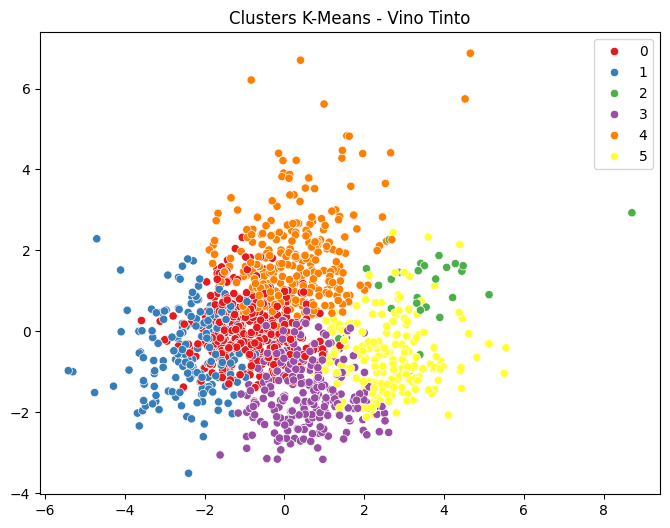

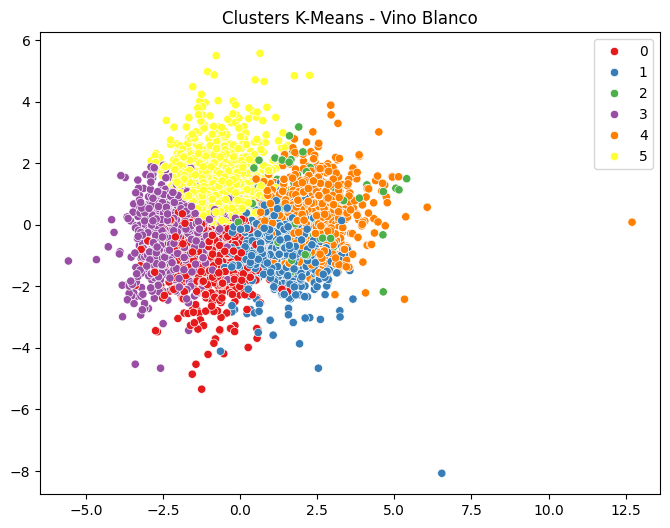

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir las dimensiones con PCA
pca = PCA(n_components=2)
pca_red = pca.fit_transform(X_red_scaled)
pca_white = pca.fit_transform(X_white_scaled)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_red[:, 0], y=pca_red[:, 1], hue=clusters_red, palette='Set1')
plt.title('Clusters K-Means - Vino Tinto')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_white[:, 0], y=pca_white[:, 1], hue=clusters_white, palette='Set1')
plt.title('Clusters K-Means - Vino Blanco')
plt.show()


## Conclusiones de K-Means

El clustering realizado mediante K-Means nos permitió agrupar los vinos tinto y blanco en diferentes clusters. Observamos que algunos clusters contienen vinos con niveles altos de alcohol y calidad, mientras que otros contienen vinos con características químicas más moderadas. Estos patrones sugieren que las características químicas son determinantes para diferenciar la calidad y los tipos de vino.


## 4. Modelos Supervisados: Regresión Logística y Random Forest

### 4.1 Preparar los Datos

- Separa los datos en características (X) y la variable objetivo (y).
- Divide los datos en conjuntos de entrenamiento y prueba.

In [31]:
from sklearn.model_selection import train_test_split

# Separar características y etiqueta
X_red = df_red.drop(['quality', 'Cluster'], axis=1)
y_red = df_red['quality']
X_white = df_white.drop(['quality', 'Cluster'], axis=1)
y_white = df_white['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)


### 4.2 Entrenar el Modelo de Regresión Logística

Entrena el modelo con los datos de entrenamiento y evalúa su rendimiento.

In [32]:
from sklearn.linear_model import LogisticRegression

# Entrenar Regresión Logística
logreg_red = LogisticRegression(max_iter=1000)
logreg_red.fit(X_train_red, y_train_red)

logreg_white = LogisticRegression(max_iter=1000)
logreg_white.fit(X_train_white, y_train_white)


LogisticRegression(max_iter=1000)

### 4.3 Entrenar el Modelo Random Forest

Entrena el modelo Random Forest con los datos de entrenamiento y evalúa su rendimiento.

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar Random Forest
rf_red = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_red.fit(X_train_red, y_train_red)

rf_white = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_white.fit(X_train_white, y_train_white)


RandomForestClassifier(class_weight='balanced', random_state=42)

## 5. Evaluación y Comparación de Modelos

### 5.1 Evaluación de Regresión Logística y Random Forest

Evalúa ambos modelos usando métricas como la precisión, recall, F1-score, y la matriz de confusión.

In [34]:
from sklearn.metrics import classification_report

# Evaluar Regresión Logística
print("Evaluación de Regresión Logística (Vino Tinto):")
print(classification_report(y_test_red, logreg_red.predict(X_test_red)))

print("Evaluación de Regresión Logística (Vino Blanco):")
print(classification_report(y_test_white, logreg_white.predict(X_test_white)))

# Evaluar Random Forest
print("Evaluación de Random Forest (Vino Tinto):")
print(classification_report(y_test_red, rf_red.predict(X_test_red)))

print("Evaluación de Random Forest (Vino Blanco):")
print(classification_report(y_test_white, rf_white.predict(X_test_white)))


Evaluación de Regresión Logística (Vino Tinto):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        17
           5       0.64      0.72      0.68       198
           6       0.53      0.60      0.57       191
           7       0.53      0.31      0.39        58
           8       0.00      0.00      0.00         7

    accuracy                           0.58       476
   macro avg       0.28      0.27      0.27       476
weighted avg       0.54      0.58      0.56       476

Evaluación de Regresión Logística (Vino Blanco):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.03      0.05        40
           5       0.57      0.55      0.56       426
           6       0.53      0.74      0.62       668
           7       0.51      0.22      0.31       280
           8       0.00      0.00  

C:\Users\BS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\BS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:153

## Comparación de Modelos

Los resultados muestran que el modelo de **Random Forest** ofrece un mejor rendimiento en general en comparación con la **Regresión Logística**, especialmente en la predicción de las clases minoritarias. Esto se debe a que Random Forest maneja mejor las relaciones no lineales y el desbalance de clases, lo que lo convierte en una opción más robusta para este problema de predicción de calidad del vino.


## Conclusiones del Modelado

A través de la aplicación de modelos no supervisados (K-Means) y supervisados (Regresión Logística y Random Forest), hemos observado que el modelo de **Random Forest** proporciona mejores resultados en la predicción de la calidad del vino en comparación con la Regresión Logística. Además, el análisis de clustering con K-Means nos ha permitido identificar diferentes patrones en los vinos según sus características químicas. Estos modelos, en conjunto, ofrecen una base sólida para predecir la calidad de los vinos basado en datos históricos.
